# Enigme 1 : La porte du trésor

Un trésor est à trouver, gardé par un gardien derrière une des deux portes.

Un gardien dit la vérité, l'autre ment toujours.

Défi : Poser une question à un seul de ces gardiens pour obtenir la localisation du trésor (porte de gauche ou porte de droite).

## Etape 1 : importation des modules

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

## Etape 2 : Création du circuit quantique avec 3 qubits

- q0 représente le gardien de droite
- q1 représente le gardien de gauche
- q2 représente le mensonge

In [2]:
qc = QuantumCircuit(3)

On affiche le rendu du circuit.

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


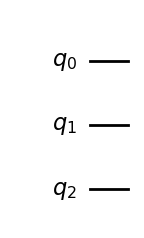

In [3]:
qc.draw("mpl")

## Etape 3 : Placement du trésor

Afin de placer le trésor de manière aléatoire, on utilise une porte Hadamard que l'on va appliquer au Qubit q0.

In [4]:
qc.h(0)

Ensuite, on utilise un C-NOT sur q0 et q1 afin de s'assurer que les 2 gardiens aient la même information.

In [5]:
qc.cx(0, 1)

On affiche le rendu du circuit.

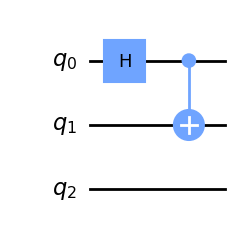

In [6]:
qc.draw("mpl")

q1 et q0 sont dorénavant intriqués car si on posait la question "Derrière quelle porte se trouve le trésor ?", les deux gardiens donneraient la même réponse.

## Etape 4 : Introduction du mensonge

On introduit le mensonge qui correspond au Qubit q2.

In [7]:
qc.h(2)
qc.barrier(0,1,2)

Dans le cas où le gardien de gauche ment, on applique une porte C-NOT sur q2 et q1 pour inverser sa réponse.

In [8]:
qc.cx(2, 1)

On affiche le rendu du circuit.

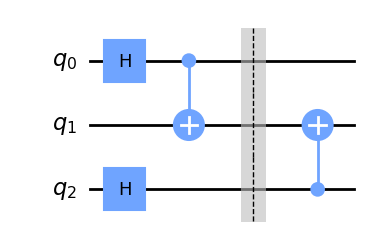

In [9]:
qc.draw("mpl")

Dans le cas où le gardien de droite ment, on inverse sa réponse.
Au préalable, on applique une porte X-NOT.

In [10]:
qc.x(2)

On affiche le rendu du circuit.

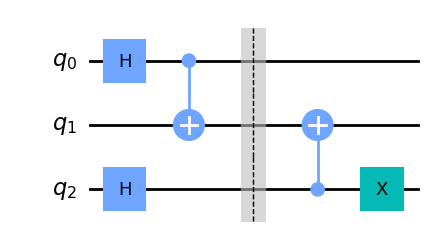

In [11]:
qc.draw("mpl")

On applique C-NOT sur le gardien de droite pour modifier sa réponse.

In [12]:
qc.cx(2, 0)

On affiche le rendu du circuit.

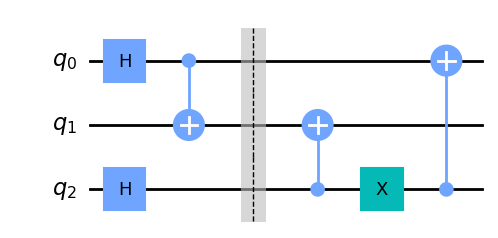

In [13]:
qc.draw("mpl")

On applique à nouveau X-NOT sur le mensonge q2.

In [14]:
qc.x(2)
qc.barrier(0, 1, 2)

On affiche le rendu du circuit.

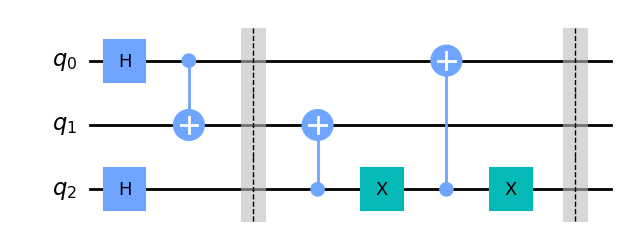

In [15]:
qc.draw("mpl")

## Etape 5 : Résolution de l'énigme

Quelle porte l'autre gardien me dirait de ne pas prendre ?
On applique une porte Swap entre q0 et q1

In [16]:
qc.swap(0, 1)

On affiche le rendu du circuit.

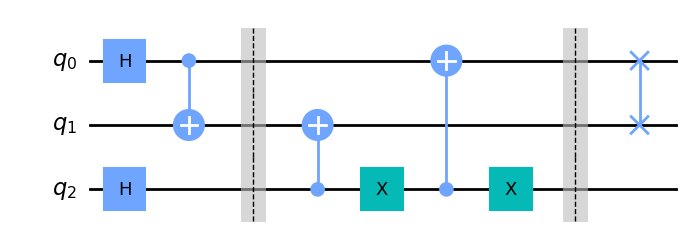

In [17]:
qc.draw("mpl")

On applique une porte X-NOT sur q0 et q1 car on demande aux gardiens de ne pas prendre.

In [18]:
qc.x(0)

In [19]:
qc.x(1)

On affiche le rendu du graphique.

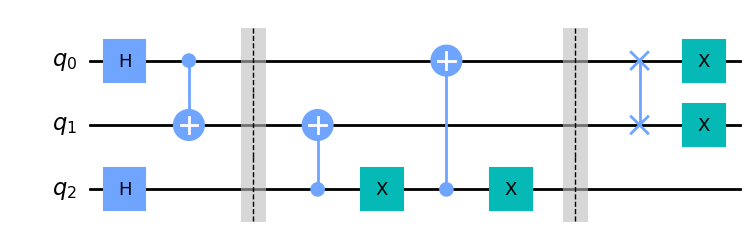

In [20]:
qc.draw("mpl")

Comme l'un des deux gardiens ment, on réapplique la ligne du mensonge commme précédemment.

In [21]:
qc.cx(2, 1)

On affiche le rendu du circuit.

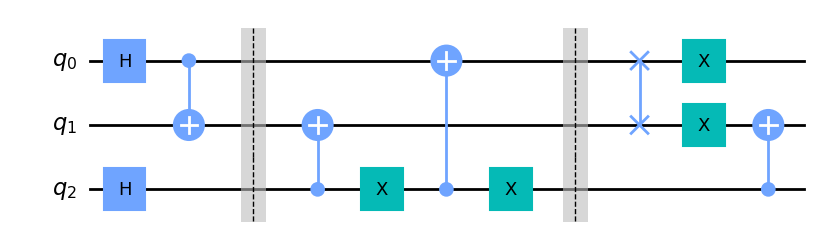

In [22]:
qc.draw("mpl")

In [23]:
qc.x(2)

In [24]:
qc.cx(2,0)

In [25]:
qc.x(2)

On affiche le rendu du circuit.

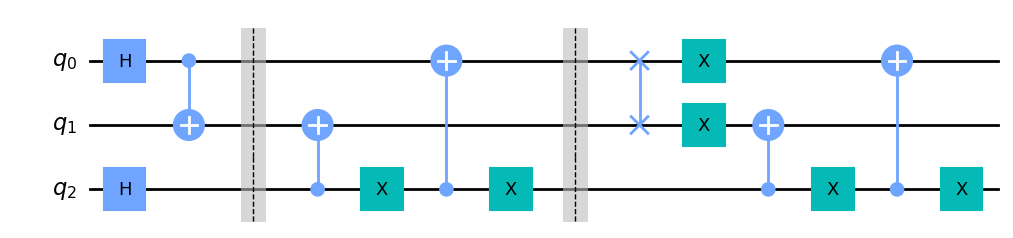

In [26]:
qc.draw("mpl")

# Etape 6 : Mesure des Qubits

On mesure les Qubit afin de savoir où se trouve le trésor, et quel gardient mentait.

In [27]:
qc.measure_all()

On affiche le rendu du circuit

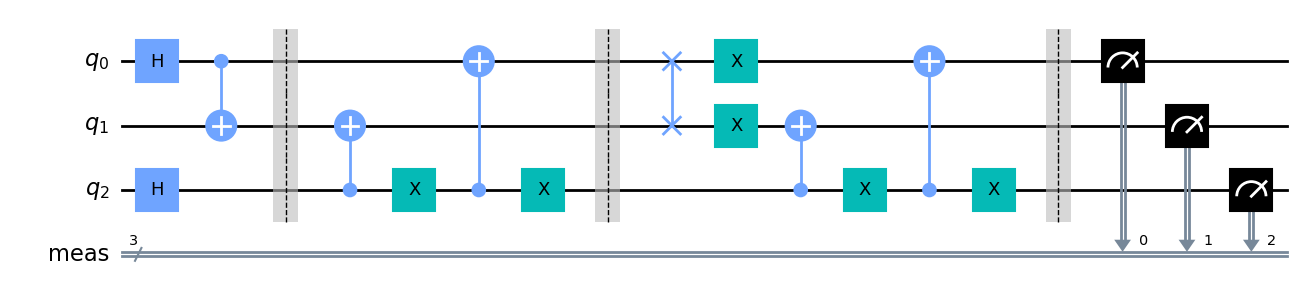

In [28]:
qc.draw('mpl')

# Etape 7 : Execution du circuit

In [29]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)

result = job.result()
counts = result.get_counts(qc)

print("Résultat de la mesure :", counts)

for outcome in counts:
    treasure_location = outcome
    lying_guard = "Gardien de droite" if outcome[0] == '1' else "Gardien de gauche"
    print(f"Le trésor se trouve derrière la porte {treasure_location}. {lying_guard} est le gardien menteur.")

Résultat de la mesure : {'111': 241, '100': 276, '000': 242, '011': 241}
Le trésor se trouve derrière la porte 111. Gardien de droite est le gardien menteur.
Le trésor se trouve derrière la porte 100. Gardien de droite est le gardien menteur.
Le trésor se trouve derrière la porte 000. Gardien de gauche est le gardien menteur.
Le trésor se trouve derrière la porte 011. Gardien de gauche est le gardien menteur.
